Paarth and I worked together on this assignment!

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from ReadFile import Read
from CenterOfMassEdited import CenterOfMass

In [113]:
def OrbitCOM(galaxy, start = 0, end = 800, n = 5):
    '''
    This function computes the orbits of the particles in the specified galaxy between two snapshots.

    Inputs:
    -------
            galaxy (str): the name of the galaxy
            start (int) : the starting snapshot number
            end (int)   : the ending snapshot number, inclusive
            n (int)     : the intervals of the read

    Returns:
    --------
            fileout
    '''
    #define the output file
    fileout = f'Orbit_{galaxy}.txt'

    #set delta and volDec to specified values
    delta = 0.1
    volDec = 2

    #create exception for M33
    if galaxy == 'M33':
        volDec = 4

    snap_ids = np.arange(start, end + 1, n)
    
    #check that the array is eligible!
    if not np.any(snap_ids):
        raise Exception('This array is not eligible.')

    #create array for orbit
    orbit = np.zeros([len(snap_ids), 7])

    #iterate through snap numbers
    for i, snap_id in enumerate(snap_ids):
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        #define the file name, including the folder path that I put them in for organization
        filename = f'./VLowRes/{galaxy}_{ilbl}.txt'
        #create center of mass object for disk stars in file
        CoM = CenterOfMass(filename, 2)
        #store time in GYr (divide by 1000)
        orbit[i, 0] = (CoM.time).to_value()/1000
        #store position
        pos = CoM.COM_P(volDec = volDec)
        orbit[i, 1:4] = pos
        #store velocity
        vel = CoM.COM_V(pos[0], pos[1], pos[2])
        orbit[i, 4:7] = vel
        #print counter
        print(f'i = {i}')
        
    #save output to file
    np.savetxt(fileout, orbit, fmt = '%11.3f'*7, comments = '#', 
        header = '{:10s}{:11s}{:11s}{:11s}{:11s}{:11s}{:11s}'.format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

    

In [114]:
#read files
MW_data = np.genfromtxt('Orbit_MW.txt', comments = '#', dtype = None, names = True)
M31_data = np.genfromtxt('Orbit_M31.txt', comments = '#', dtype = None, names = True)
M33_data = np.genfromtxt('Orbit_M33.txt', comments = '#', dtype = None, names = True)

In [57]:
def diff(vector1, vector2):
    '''
    This function computes the difference between two vectors.
    
    Inputs:
    -------
            vector1 (array): array containing the elements of the first vector
            vector2 (array): array containing the elements of the second vector

    Returns:
    --------
            magnitude (float): the magnitude of the difference of vector1 and vector2
    '''
    #take difference of arrays
    difference = vector1 - vector2
    #take magnitude
    magnitude = np.sqrt(difference[0]**2 + difference[1]**2 + difference[2]**2)
    return magnitude

In [98]:
#evaluate the mrelative separation and velocity of MW and M31, and store in array
MW_M31_relative = np.zeros([len(MW_data), 3])
for i in range(len(MW_M31_relative)):
    MW_M31_relative[i, 0] = MW_data[i][0]
    MW_M31_relative[i, 1] = diff(np.array(MW_data.tolist()[i][1:4]), np.array(M31_data.tolist()[i][1:4]))
    MW_M31_relative[i, 2] = diff(np.array(MW_data.tolist()[i][4:7]), np.array(M31_data.tolist()[i][4:7]))

In [103]:
#evaluate the mrelative separation and velocity of M33 and M31, and store in array
M33_M31_relative = np.zeros([len(M31_data), 3])
for i in range(len(MW_M31_relative)):
    M33_M31_relative[i, 0] = M31_data[i][0]
    M33_M31_relative[i, 1] = diff(np.array(M33_data.tolist()[i][1:4]), np.array(M31_data.tolist()[i][1:4]))
    M33_M31_relative[i, 2] = diff(np.array(M33_data.tolist()[i][4:7]), np.array(M31_data.tolist()[i][4:7]))

Text(0.5, 1.0, 'MW and M31 Separation')

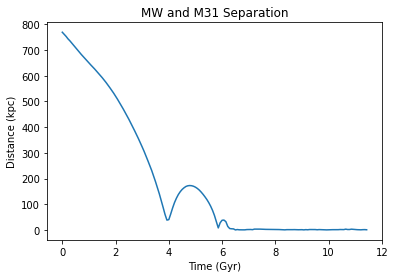

In [112]:
#plot everything!
plt.plot(MW_M31_relative[:, 0], MW_M31_relative[:, 1])
plt.xlabel('Time (Gyr)')
plt.ylabel('Distance (kpc)')
plt.title('MW and M31 Separation')


Text(0.5, 1.0, 'M33 and M31 Separation')

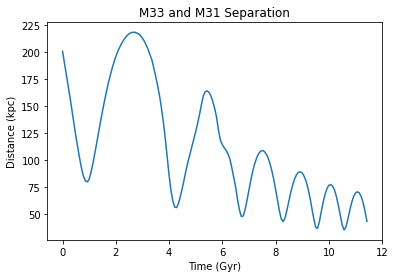

In [106]:
plt.plot(M33_M31_relative[:, 0], M33_M31_relative[:, 1])
plt.xlabel('Time (Gyr)')
plt.ylabel('Distance (kpc)')
plt.title('M33 and M31 Separation')


Text(0.5, 1.0, 'MW and M31 Relative Velocity')

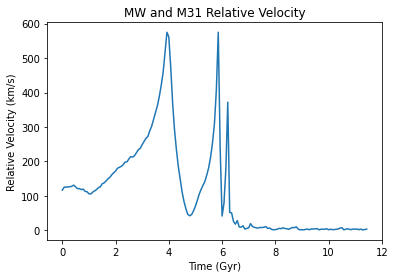

In [109]:
plt.plot(MW_M31_relative[:, 0], MW_M31_relative[:, 2])
plt.xlabel('Time (Gyr)')
plt.ylabel('Relative Velocity (km/s)')
plt.title('MW and M31 Relative Velocity')


Text(0.5, 1.0, 'M33 and M31 Relative Velocity')

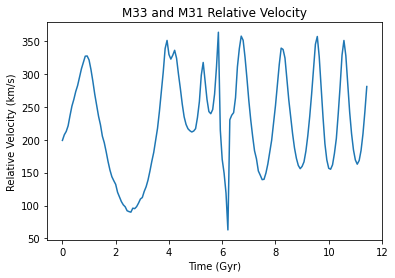

In [108]:
plt.plot(M33_M31_relative[:, 0], M33_M31_relative[:, 2])
plt.xlabel('Time (Gyr)')
plt.ylabel('Relative Velocity (km/s)')
plt.title('M33 and M31 Relative Velocity')


1. They will experience two close encounters before their collision.
2. The relative velocity increases and separation are inversely proportional.
3. They will merge in about 5 Gyr. The angular frequency of M33's orbit will increase.
4. The decay rate is around 66%. Not sure how to apply that to calculating the time before collision!